<a href="https://colab.research.google.com/github/gplinkage/DataScienceBootCamp/blob/main/Projects/Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
errors= pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_errors.csv')
failures = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_failures.csv')
machines = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_machines.csv')
maint = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_maint.csv')
telemtry = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/Microsoft Azure Predictive Maintenance/PdM_telemetry.csv')

In [64]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [8]:
errors.isna().sum()

datetime     0
machineID    0
errorID      0
dtype: int64

In [10]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [11]:
failures.isna().sum()

datetime     0
machineID    0
failure      0
dtype: int64

In [13]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [15]:
machines.isna().sum()

machineID    0
model        0
age          0
dtype: int64

In [17]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [21]:
maint.isna().sum()

datetime     0
machineID    0
comp         0
dtype: int64

In [23]:
telemtry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [24]:
telemtry.isna().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

*** EDAs for machines and failures ***

In [27]:
machines['model'] = machines['model'].astype('object')

In [29]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


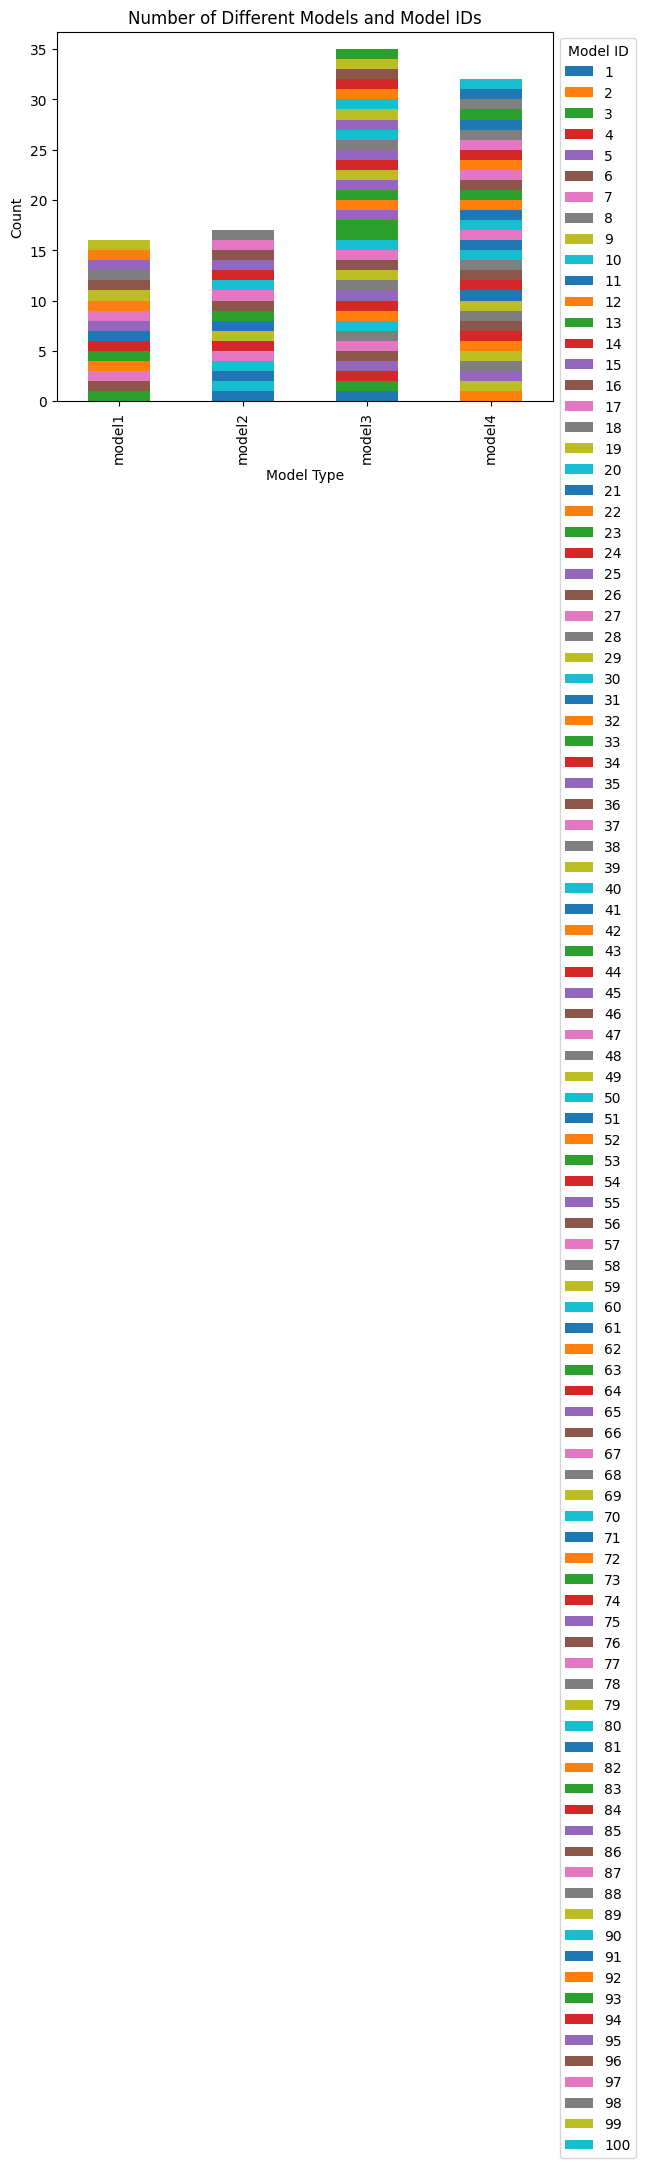

In [63]:
grouped_data = machines.groupby(['model', 'machineID']).size().unstack()

grouped_data.plot(kind='bar', stacked=True) # Plotting a bar chart
plt.title('Number of Different Models and Model IDs')
plt.xlabel('Model Type')
plt.ylabel('Count')
plt.legend(title='Model ID', bbox_to_anchor=(1, 1))
plt.show()

In [45]:
import plotly.express as px

In [47]:
fig = px.histogram(machines, x='age', color='model', barmode='stack',
                   title='Machine Age Distribution', template='plotly_dark',
                   labels={'age': 'Age', 'model': 'Model'},
                   category_orders={'model': ['model1', 'model2', 'model3', 'model4']})
fig.show()

In [53]:
failures['datetime'] = pd.to_datetime(
    failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('object')

In [55]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


<ipython-input-61-c3e5b85c27cb>:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



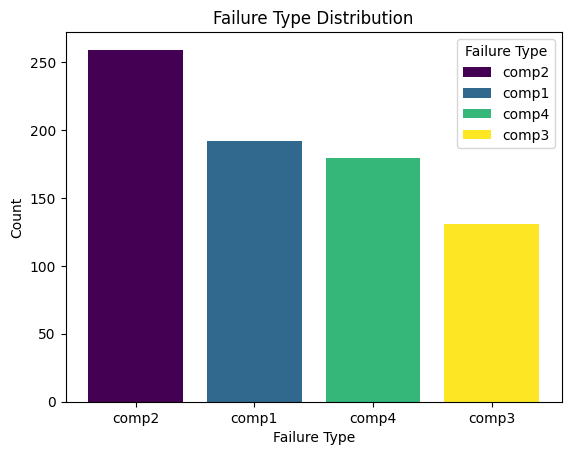

In [61]:
failure_counts = failures['failure'].value_counts()
colors = plt.cm.get_cmap('viridis', len(failure_counts))
bars = plt.bar(failure_counts.index, failure_counts, color=colors(np.arange(len(failure_counts))))
plt.legend(bars, failure_counts.index, title='Failure Type')

plt.title('Failure Type Distribution')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()